# Classification by Logistic Regression

![](banner_logreg.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
                     
update_geom_defaults("path", list(color="black"))

.................................................... start of document ....................................................

## Introduction

Motivation, context, history, related topics ...

The logistic regression method is used to build a classification model.  The form of the model is a set of coefficients of a vector sigmoid function.

Method:<br>
Treat class values as numeric (0 or 1).  Find the vector sigmoid function that best approximates the data.  Use this function as a measure of the probability of being in a certain class.

$$
P(class=B) = \frac{1}{1 + e^{\, - \, \large {(\beta_0 + \beta_1x_1 + \beta_2x_2 + ...)}}}
$$

## Terms

* Sigmoid function or logistic function

## About Sigmoid Functions

A sigmoid function rescales any numeric value into range 0 to 1.

$$sigmoid(x) = \frac{1}{1 + e^{\, - \, \large {x}}} $$

$$sigmoid_{\beta_0\beta_1}(x) = \frac{1}{1 + e^{\, - \, \large {(\beta_0 + \beta_1x)}}} $$
<p style="text-align: center;"> range: $0 < sigmoid_{\beta_0\beta_1}(x) < 1$, for any $x$ </p>

## Logistic Regression with One Predictor Variable

### Data

Consider these data and new observation.

data 
 
 
 x1 
 class 
 
 
 
 
 -9 
 A 
 
 
 -5 
 A 
 
 
 -1 
 B 
 
 
 0 
 A 
 
 
 3 
 B 
 
 
 5 
 B 
 
 
 9 
 B 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 1

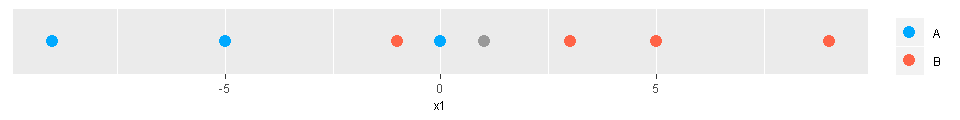

In [3]:
data = data.frame(x1=c(-9,-5, -1, 0, 3, 5, 9), class=c("A", "A", "B", "A", "B", "B", "B"))
new = data.frame(x1=1)
layout(fmt(data), fmt(new))

output_size(8,1)
ggplot(data) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=new, color=NEW_COLOR) +
theme.x_axis_only
output_size(restore)

### Convert Class Variable from Categorical to Binary

x1,class,class.bin
-9,A,0
-5,A,0
-1,B,1
0,A,0
3,B,1
5,B,1
9,B,1


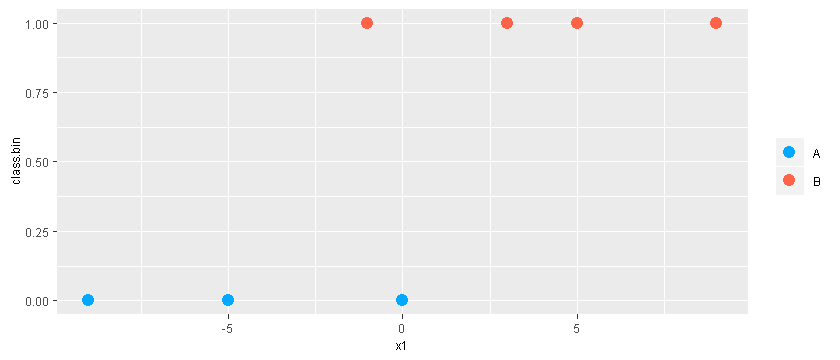

In [5]:
data$class.bin = as.binary(data$class, "B")
fmt(data, "data (transformed)")

ggplot(data) + geom_point(aes(x=x1, y=class.bin, color=class))

### Assume Sigmoid Function Approximates the Underlying Process

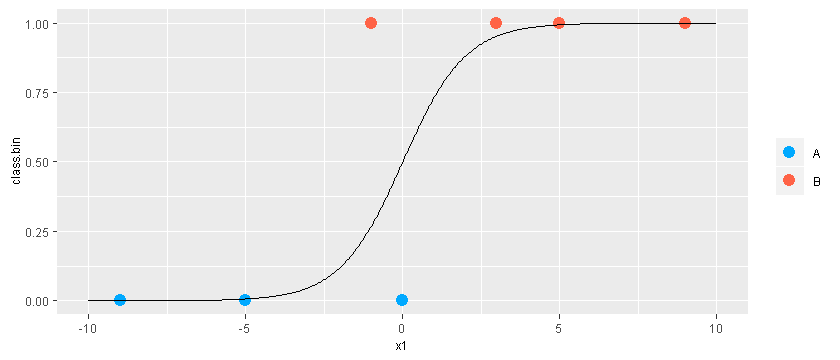

In [6]:
ggplot(data) + xlim(-10,10) + 
geom_point(aes(x=x1, y=class.bin, color=class)) + stat_function(fun=sigmoid, n=500)

### Optimize Sigmoid Function to Best Fit the Existing Data

b0,b1
0.444605,0.7040943


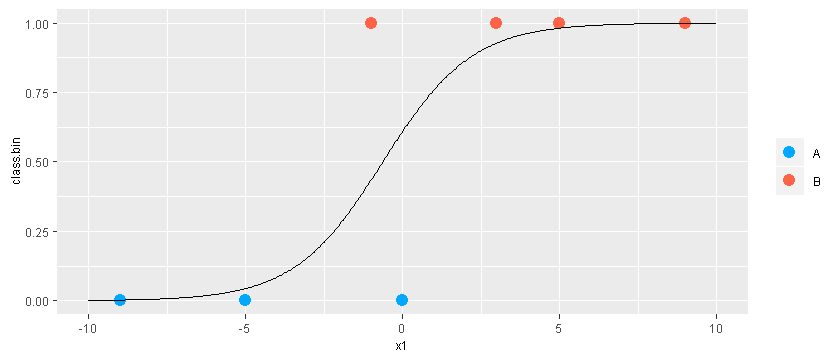

In [8]:
mysigmoid = function(x, b0, b1) { 1 / (1 + exp(-(b0 + b1*x))) }

model = glm(class ~ x1, binomial(link="logit"), data)
b0  = as.numeric(model$coefficients["(Intercept)"])
b1 = as.numeric(model$coefficients["x1"])

fmt(data.frame(b0, b1), "model")

ggplot(data) + xlim(-10,10) + 
geom_point(aes(x=x1, y=class.bin, color=class)) +
stat_function(fun=mysigmoid, args=c(b0, b1), n=500)

### Prediction

The new observation's class is predicted to be B because sigmoid(1) = 0.76 > 0.50, assuming a cutoff of 0.50.

x1,1-sigmoid=prob.A,sigmoid=prob.B,class.predicted
1,0.2407267,0.7592733,B


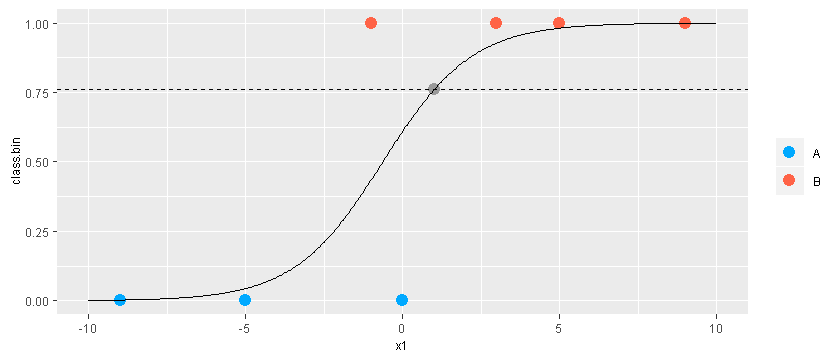

In [10]:
fmt(cbind(new,
      "1-sigmoid=prob.A"=1-mysigmoid(new$x1, b0, b1), 
      "sigmoid=prob.B"=mysigmoid(new$x1, b0, b1), 
      class.predicted="B"), "new")

ggplot(data) + xlim(-10,10) + 
geom_point(aes(x=x1, y=class.bin, color=class)) +
geom_point(aes(x=x1, y=mysigmoid(x1, b0, b1)), data=new, color=NEW_COLOR) +
geom_hline(aes(yintercept=mysigmoid(x1, b0, b1)), data=new, linetype="dashed") +
stat_function(fun=mysigmoid, args=c(b0, b1), n=500)

## About Vector Sigmoid Functions

A vector sigmoid function rescales any vector of numeric values into range 0 to 1.

$$sigmoid_{\beta_0\beta_1\beta_2...} = \frac{1}{1 + e^{\, - \, \large {(\beta_0 + \beta_1x_1 + \beta_2x_2 + ...)}}} $$
<p style="text-align: center;"> range: $0 < sigmoid_{\beta_0\beta_1\beta_2...}(x1, x2, ...) < 1$, for any $x1, x2, ...$ </p>

## Logistic Regression with Many Predictor Variables

### Data

Consider these data and new observations.

data 
 
 
 x1 
 x2 
 x3 
 class 
 
 
 
 
 4 
 9 
 9 
 A 
 
 
 2 
 7 
 8 
 B 
 
 
 3 
 6 
 2 
 A 
 
 
 2 
 5 
 2 
 B 
 
 
 5 
 4 
 3 
 A 
 
 
 1 
 8 
 3 
 B 
 
 
 7 
 2 
 4 
 A 
 
 
 8 
 1 
 4 
 B 
 
 
 
 new 
 
 
 x1 
 x2 
 x3 
 
 
 
 
 5 
 8 
 1 
 
 
 6 
 7 
 5 
 
 
 4 
 6 
 2 
 
 
 1 
 1 
 6

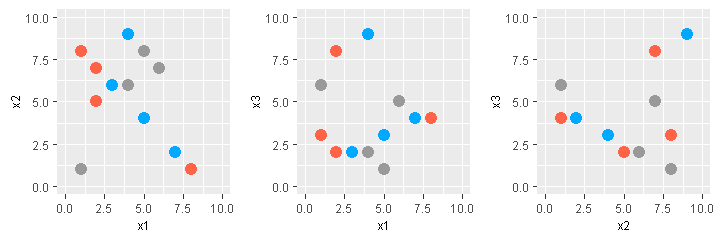

In [12]:
data = data.frame(x1=c(4,2,3,2,5,1,7,8), x2=c(9,7,6,5,4,8,2,1), x3=c(9,8,2,2,3,3,4,4),
                  class=c("A", "B", "A", "B", "A", "B", "A", "B"))
new = data.frame(x1=c(5,6,4,1), x2=c(8,7,6,1), x3=c(1,5,2,6))

layout(fmt(data), fmt(new))

output_size(6,2)
p1 = ggplot(data) + xlim(0,10) + ylim(0,10) + geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR) + theme.no_legend
p2 = ggplot(data) + xlim(0,10) + ylim(0,10) + geom_point(aes(x=x1, y=x3, color=class)) + geom_point(aes(x=x1, y=x3), data=new, color=NEW_COLOR) + theme.no_legend
p3 = ggplot(data) + xlim(0,10) + ylim(0,10) + geom_point(aes(x=x2, y=x3, color=class)) + geom_point(aes(x=x2, y=x3), data=new, color=NEW_COLOR) + theme.no_legend
grid.arrange(p1, p2, p3, nrow=1)
output_size(restore)

### Model

In [14]:
model = glm(class ~ x1+x2+x3, binomial(link="logit"), data)
b0 = as.numeric(model$coefficients["(Intercept)"])
b1 = as.numeric(model$coefficients["x1"])
b2 = as.numeric(model$coefficients["x2"])
b3 = as.numeric(model$coefficients["x3"])

fmt(data.frame(b0, b1, b2, b3), "model")

b0,b1,b2,b3
88.58359,-11.88038,-10.9658,4.248673


### Prediction

The new observations' classes are predicted like this, assuming a cutoff of 0.50.

In [15]:
cutoff = 0.5

# prob.B = 1 / (1 + exp(-(b0 + b1*new$x1 + b2*new$x2 + b3*new$x3))) # calc explicitly
prob.B = predict(model, new, type="response") # calc using predict function
prob = data.frame(A=1-prob.B, B=prob.B)

class.predicted = as.class(prob, class="A", cutoff)

cbind(new, "1-sigmoid=prob.A"=prob$A, "sigmoid=prob.B"=prob.B, class.predicted)

x1,x2,x3,1-sigmoid=prob.A,sigmoid=prob.B,class.predicted
5,8,1,1.000000e+00,2.220446e-16,A
6,7,5,1.000000e+00,2.220446e-16,A
4,6,2,9.999999e-01,8.893374e-08,A
1,1,6,2.220446e-16,1.000000e+00,B


## Code

### Useful Functions

In [10]:
# help(glm, package="stats")
# help(predict.glm) # use predict to call this function

### Templates

In [16]:
# Build a logistic regression model

data = data.frame(x1=c(1,2,3,4,5,6,7,8), x2=c(9,7,6,5,4,3,2,1), x3=c(1,1,2,2,3,3,4,4),
                  class=c("A", "B", "A", "B", "A", "B", "A", "B"))

model = glm(class ~ x1+x2+x3, binomial(link="logit"), data)
model


Call:  glm(formula = class ~ x1 + x2 + x3, family = binomial(link = "logit"), 
    data = data)

Coefficients:
        (Intercept)                   x1                   x2  
 24.566069711384891   49.132138234915431    0.000000000001827  
                 x3  
-98.264276469826200  

Degrees of Freedom: 7 Total (i.e. Null);  4 Residual
Null Deviance:	    11.09 
Residual Deviance: 0.0000000003429 	AIC: 8

In [17]:
# Use a logistic regression model to make predictions

new = data.frame(x1=c(5,6,7,8), x2=c(8,7,6,5), x3=c(1,5,2,6))
cutoff = 0.5

prob.B = predict(model, new, type="response")
prob = data.frame("A"=1-prob.B, "B"=prob.B)
prediction = as.class(prob, class="B", cutoff)
cbind(new, prediction)

x1,x2,x3,prediction
5,8,1,B
6,7,5,A
7,6,2,B
8,5,6,A


## Expectations

Know about this:
* How to build a logistic regression model, and use it to predict the classes of new observations, using R's `glm` and `predict` functions

## Further Reading

* https://www.statmethods.net/advstats/glm.html

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised March 31, 2021
</span>
</p>